# Portfolio optimization using Nasdaq 100 stocks

The purpose of this project is to build an efficient frontier with the stocks that composes Nasdaq 100. The Nasdaq 100 Index is a basket of the 100 largest, most actively traded U.S companies listed on the Nasdaq stock exchange. The index includes companies from various industries except for the financial industry.
The efficient frontier provides valuable insights for portfolio managers in making informed investment decisions. It enables them to compare and evaluate different investment options and select the most suitable stocks to include in the portfolio.

## 1. Importing data

### 1.1. Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime, timedelta
from yahoo_fin.stock_info import get_data
import seaborn as sns

### 1.2. List of stocks

Getting the list of constituents of the index through web scraping.

In [2]:
# HTTP request to the nasdaq 100 URL
headers={"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36"}
url = "https://api.nasdaq.com/api/quote/list-type/nasdaq100"
res=requests.get(url,headers=headers) #sending an HTTP GET request
main_data=res.json()['data']['data']['rows'] #navigating through the JSON structure 

In [3]:
# List of symbols and companies
symbols = np.array([main_data[i]['symbol'] for i in range(len(main_data))]) #ticker
companyNames=np.array([main_data[i]['companyName'][:15] for i in range(len(main_data))]) #company/stock name
symbolNames=dict(zip(symbols, companyNames)) #each ticker with its compay name

### 1.3. Stock prices


To extract 10 years of data from internet for all the stocks, first we need to define the start and end dates.

In [4]:
# Dates to download
years=10
end_date = datetime.now() - timedelta(days=1) #Calculate end date.
end_date=end_date.replace(day=1) #replacing by first day of the month
start_date = end_date - timedelta(weeks=52*years) #start date for 10 years
start_date=start_date.replace(day=1) #replacing by first day of the month

# Format the dates as strings
start_date_str = start_date.strftime("%m/%d/%Y")
end_date_str = end_date.strftime("%m/%d/%Y")

print(end_date)
print(start_date)


2023-06-01 22:52:50.354672
2013-06-01 22:52:50.354672


In [5]:
# Creating a dictionary for each stock data
data = {}
for symbol in symbols:
    stock_data = get_data(symbol, start_date=start_date_str, end_date=end_date_str, index_as_date=True, interval="1d")
    stock_data = stock_data["close"] #only close price
    data[symbol] = stock_data

# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(data);df

,CPRT,AMGN,CMCSA,INTC,KLAC,PCAR,CTAS,PAYX,LRCX,ADSK,...,ABNB,WBD,COST,KDP,LCID,ADP,MAR,AMZN,AMAT,GEHC
2013-06-03,8.930000,99.129997,20.230000,25.240000,56.900002,35.813332,45.709999,37.380001,48.250000,37.380001,...,NaN,40.373020,110.879997,47.020000,NaN,61.062336,42.200001,13.344000,15.430000,NaN
2013-06-04,8.867500,97.290001,20.459999,25.360001,56.980000,35.886665,45.400002,37.099998,47.980000,36.700001,...,NaN,40.209503,110.660004,46.910000,NaN,60.553116,40.410000,13.285000,15.540000,NaN
2013-06-05,8.677500,94.599998,20.094999,24.700001,56.500000,35.186668,44.849998,36.660000,47.279999,36.119999,...,NaN,38.773632,109.169998,46.490002,NaN,59.578579,40.389999,13.358500,15.150000,NaN
2013-06-06,8.605000,97.489998,20.120001,24.650000,56.080002,35.560001,45.230000,36.720001,47.369999,35.970001,...,NaN,38.334187,111.089996,46.080002,NaN,59.648815,41.009998,13.391500,14.950000,NaN
2013-06-07,8.070000,98.809998,20.590000,24.590000,56.770000,36.233334,45.799999,37.150002,48.400002,36.650002,...,NaN,39.034237,110.580002,46.330002,NaN,60.500439,41.660000,13.843500,15.490000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-24,86.459999,221.320007,39.980000,29.000000,408.899994,70.440002,462.290009,108.330002,565.869995,196.750000,...,105.709999,11.660000,482.760010,31.920000,7.49,214.000000,168.250000,116.750000,121.730003,76.529999
2023-05-25,87.750000,217.460007,39.090000,27.400000,434.250000,71.019997,464.200012,107.879997,602.099976,197.559998,...,104.419998,11.090000,486.549988,31.549999,7.61,210.399994,171.660004,115.000000,130.470001,79.860001
2023-05-26,87.879997,216.929993,39.480000,29.000000,461.190002,71.349998,468.720001,108.169998,628.250000,198.899994,...,106.809998,11.440000,507.260010,31.410000,7.87,212.479996,171.759995,120.110001,136.059998,78.430000
2023-05-30,88.599998,218.529999,39.160000,29.990000,458.730011,71.160004,471.589996,107.339996,629.960022,195.039993,...,107.190002,11.300000,508.029999,31.000000,7.71,210.119995,169.089996,121.660004,136.570007,77.959999


In [6]:
# Removing stocks with incomplete data
df_clean=df.dropna(axis=1)

## 2. Variables calculation

In [7]:
dailyReturns = df_clean.pct_change().dropna()
stockNames=list(dailyReturns.columns) #list of names
k=len(stockNames);k #number of Stocks

81

In [8]:
r=np.log(dailyReturns+1).sum()/years #Annualized returns: Total return divided by number of years
covMatrix = dailyReturns.cov()*252;covMatrix #Annualized covariance (assuming normallity, independence,and stationarity of returns)
Q = covMatrix.to_numpy() #NumPy excels in terms of memory efficiency and speed
stdDeviations = np.sqrt(np.diag(covMatrix))
correlation_matrix = np.corrcoef(covMatrix)

## 3. Optimization

In this phase, the initial focus is on minimizing risk rather than maximizing returns when constructing the efficient frontier. This approach was chosen because it is often more intuitive to have a target or minimum required return in mind, rather than arbitrarily specifying a desired level of standard deviation or risk.

### 3.1. Minimizing risk

The specific constraints applied may vary depending on regulations, preferences, and other factors. For the purpose of this exercise, we assume that the portfolio has a required return of 5% and maximum limit of 15% for exposure to any individual stock.

In [9]:
# Create Portfolio Model
from gurobipy import *
m = Model("Portfolio")

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-15


In [10]:
# Create Decision Variables: weights
decVars = m.addVars(k, vtype=GRB.CONTINUOUS, name="weights")

In [11]:
# Define Objective Function
m.setObjective(quicksum(decVars[i]*Q[i,j]*decVars[j] for i in range(k) for j in range(k)), GRB.MINIMIZE)
m.update()

In [12]:
# Define Constraints
m.addConstr(quicksum(decVars[i]*r[i] for i in range(k)) >= 0.05, "Required_Mean_Return") #as the Fed rate is around 5%, let's assume that this is our required return.
m.addConstr(quicksum(decVars[i] for i in range(k)) == 1, "Full_investment")
m.addConstrs(decVars[i] >= 0.00 for i in range(k)) 
m.addConstrs(decVars[i] <= 0.149 for i in range(k)) 
m.update() 

In [33]:
# Optimization
m.optimize()

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 164 rows, 81 columns and 324 nonzeros
Model fingerprint: 0x7120ad93
Model has 3321 quadratic objective terms
Coefficient statistics:
  Matrix range     [3e-03, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [3e-02, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [5e-02, 1e+00]


In [14]:
obj_value = m.objVal
sd_obj=np.sqrt(obj_value) #Risk. Standard deviation is more interpretable than variance
print("The minimum risk for a return of 5% is: ", round(sd_obj,4))

The minimum risk for a return of 5% is:  0.144


In [15]:
# Variables for our df
weights = [round(decVars[i].x * 100, 2) for i in range(k)]
companyNames = [symbolNames[i] for i in stockNames]  # Replace stockNames with your list of stock names
stdDeviations = [round(stdDeviations[i] , 6) for i in range(k)]
returnList = [round(r[i] , 6) for i in range(k)] #Avg annual return for each stock
cv=np.divide(stdDeviations, returnList)
    
# Combine stock names and weights into tuples
stock_weights = list(zip(stockNames, companyNames,weights,returnList,stdDeviations,cv))
stock_weights.sort(key=lambda x: x[2], reverse=True) #sorted
    
# Get the top 10 weights
stock_weights_df = pd.DataFrame(stock_weights, columns=['Symbol', 'Company', 'Weight', 'Return', 'StDev','CV'])
print(stock_weights_df.loc[:10])
print(f"\nThe most relevant stocks for this portfolio are: {stock_weights_df.Company[0]}, {stock_weights_df.Company[1]}, {stock_weights_df.Company[2]}, and {stock_weights_df.Company[3]}. These stocks hold significant individual weights of over {int(stock_weights_df.Weight[3])}% each and collectively account for {int(sum(stock_weights_df.Weight[:3]))}% of the portfolio's composition.")

   Symbol          Company  Weight    Return     StDev         CV
0     AEP  American Electr   14.90  0.058861  0.206003   3.499822
1     PEP  PepsiCo, Inc. C   14.89  0.080655  0.182753   2.265861
2    COST  Costco Wholesal   11.75  0.152902  0.211749   1.384867
3     AZN  AstraZeneca PLC   10.89  0.104331  0.249638   2.392750
4    GILD  Gilead Sciences    6.50  0.037047  0.270704   7.307042
5     KDP  Keurig Dr Peppe    6.32 -0.041272  0.342361  -8.295236
6     XEL  Xcel Energy Inc    6.17  0.081604  0.206269   2.527682
7    PCAR  PACCAR Inc. Com    4.60  0.065259  0.252041   3.862165
8    SIRI  Sirius XM Holdi    3.41  0.002849  0.262574  92.163566
9    EBAY  eBay Inc. Commo    3.03  0.063787  0.294519   4.617226
10     EA  Electronic Arts    3.01  0.171697  0.309549   1.802879

The most relevant stocks for this portfolio are: American Electr, PepsiCo, Inc. C, Costco Wholesal, and AstraZeneca PLC. These stocks hold significant individual weights of over 10% each and collectively acc

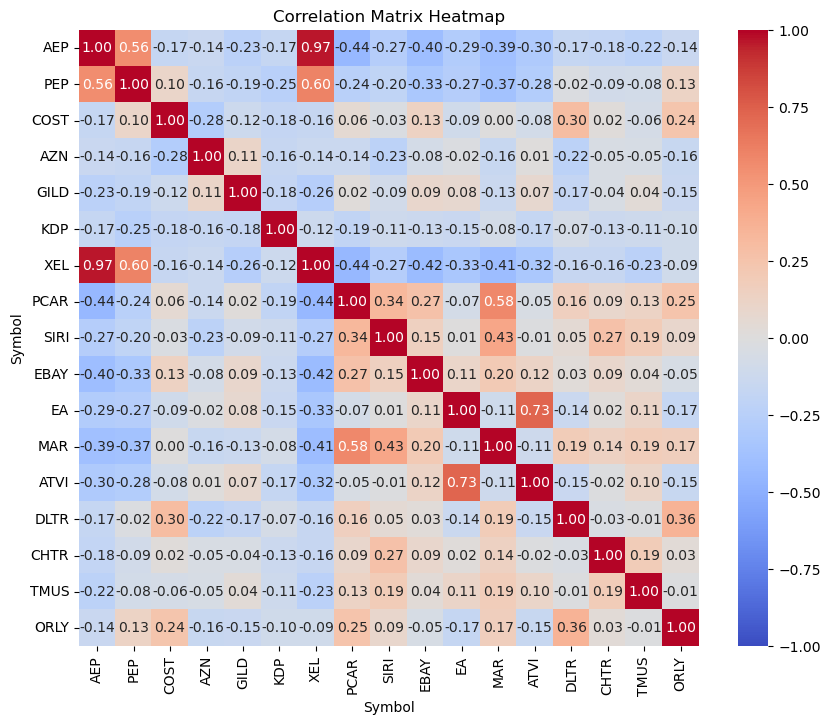


Stocks with low or negative correlations can potentially reduce overall portfolio risk by offsetting losses in one stock with gains in another. This correlation matrix illustrates that the top-ranked stocks tend to have more instances of negative correlations compared to the stocks at the bottom. This reinforces the benefits of diversification, as it allows investors to potentially minimize risk by selecting stocks with different performance patterns.


In [16]:
# Filtering stocks with a weight > 1%
stocks_rel=stock_weights_df['Symbol'][stock_weights_df.Weight>1]
covMatrix_2=covMatrix.loc[stocks_rel, stocks_rel]

# Calculate the correlation matrix
correlation_matrix_2 = np.corrcoef(covMatrix_2)

# Convert the correlation matrix to a pandas DataFrame for better visualization
df_correlation_2 = pd.DataFrame(correlation_matrix_2, columns=stocks_rel, index=stocks_rel)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlation_2, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()
print(f"\nStocks with low or negative correlations can potentially reduce overall portfolio risk by offsetting losses in one stock with gains in another. This correlation matrix illustrates that the top-ranked stocks tend to have more instances of negative correlations compared to the stocks at the bottom. This reinforces the benefits of diversification, as it allows investors to potentially minimize risk by selecting stocks with different performance patterns.")

### 3.2. Maximizing return for different risk levels

After determining the minimum risk threshold, which sets the lower limit for our analysis, we will proceed to calculate the optimal portfolio that maximizes returns as we gradually increase the risk levels.

In [17]:
#Create a list of MinRisk variation starting with The objective Value from Model m
minRiskSD=np.arange(sd_obj , sd_obj + 0.1, 0.01)
MinRisk=np.power(minRiskSD,2)
n = len(MinRisk)
#Create a dataframe with different levels of risk 
dfRisk=pd.DataFrame({"Ref":np.array(range(1,n+1)),"SD":minRiskSD,"VAR":MinRisk})
print(dfRisk)

   Ref       SD       VAR
0    1  0.14401  0.020739
1    2  0.15401  0.023719
2    3  0.16401  0.026899
3    4  0.17401  0.030280
4    5  0.18401  0.033860
5    6  0.19401  0.037640
6    7  0.20401  0.041620
7    8  0.21401  0.045800
8    9  0.22401  0.050181
9   10  0.23401  0.054761


In [18]:
#Create model w To Maximize Return subject to Maximum Risk
w = Model("Portfolio2")
w.remove(w.getConstrs())

In [19]:
returns = []

dWeights={}
for risk_level in range(n):
    decVars = []
    top_weights = []
    for i in range(k):
        decVars.append(w.addVar(vtype=GRB.CONTINUOUS))
    w.update()
    
    # Constraints
    w.addConstr(quicksum(decVars[i] for i in range(k)) == 1, "Full_investment")
    w.addConstrs(decVars[i] >= 0.000 for i in range(k))
    w.addConstrs(decVars[i] <= 0.149 for i in range(k))
    w.addConstr(quicksum(decVars[i] * Q[i, j] * decVars[j] for i in range(k) for j in range(k)) <= list(dfRisk['VAR'])[risk_level], "Maximimum_Risk_Constraint")
    
    # Set objective
    w.setObjective(quicksum(decVars[i] * r[i] for i in range(k)), GRB.MAXIMIZE)
    w.update()
    w.optimize()
    
    returns.append(w.objVal)
    
    weights = [decVar.x for decVar in decVars]
    companyNames = [symbolNames[i] for i in stockNames] 
    stdDeviations = [round(stdDeviations[i] , 6) for i in range(k)]
    returnList = [round(r[i] , 6) for i in range(k)]
    cv=np.divide(stdDeviations,returnList)

    
    
    top_weights.extend(list(zip(stockNames, companyNames,weights,returnList,stdDeviations,cv)))
    
    dWeights[risk_level+1]=top_weights


Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 163 rows, 81 columns and 243 nonzeros
Model fingerprint: 0x689c6cba
Model has 1 quadratic constraint
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-02, 7e-01]
  Objective range  [3e-03, 3e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 1e+00]
  QRHS range       [2e-02, 2e-02]
Presolve removed 162 rows and 0 columns
Presolve time: 0.02s
Presolved: 83 rows, 163 columns, 3484 nonzeros
Presolved model has 1 second-order cone constraint
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.402e+03
 Factor NZ  : 3.486e+03
 Factor Ops : 1.941e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.06905504e+00  5.58153973e+00  3.37e+01 7.79e-01  2.62e-01 

Optimal objective 2.03078006e-01

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 815 rows, 405 columns and 1215 nonzeros
Model fingerprint: 0xf6d95e46
Model has 5 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-02, 7e-01]
  Objective range  [3e-03, 3e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 1e+00]
  QRHS range       [2e-02, 3e-02]
Presolve removed 810 rows and 0 columns
Presolve time: 0.03s
Presolved: 415 rows, 815 columns, 17420 nonzeros
Presolved model has 5 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.701e+04
 Factor NZ  : 1.743e+04 (roughly 1 MB of memory)
 Factor Ops : 9.703e+05 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
  

Optimal objective 2.55089388e-01

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1467 rows, 729 columns and 2187 nonzeros
Model fingerprint: 0xe61b7226
Model has 9 quadratic constraints
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  QMatrix range    [1e-02, 7e-01]
  Objective range  [3e-03, 3e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-01, 1e+00]
  QRHS range       [2e-02, 5e-02]
Presolve removed 1458 rows and 0 columns
Presolve time: 0.05s
Presolved: 747 rows, 1467 columns, 31356 nonzeros
Presolved model has 9 second-order cone constraints
Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 3.062e+04
 Factor NZ  : 3.137e+04 (roughly 1 MB of memory)
 Factor Ops : 1.746e+06 (less than 1 second per iteration)
 Threads    : 4

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time

   Key    Return     Risk
0    1  0.086907  0.14401
1    2  0.156355  0.15401
2    3  0.183766  0.16401
3    4  0.203078  0.17401
4    5  0.218976  0.18401
5    6  0.232741  0.19401
6    7  0.244621  0.20401
7    8  0.255089  0.21401
8    9  0.263776  0.22401
9   10  0.270653  0.23401

The graph illustrates the positive relationship between the risk level and the return of the optimal portfolios, when the standard deviation increases from 0.144 to 0.234.
Notably, in the first change in risk level, the return jumps from 8.69% to 15.64%, highlighting a substantial increase.


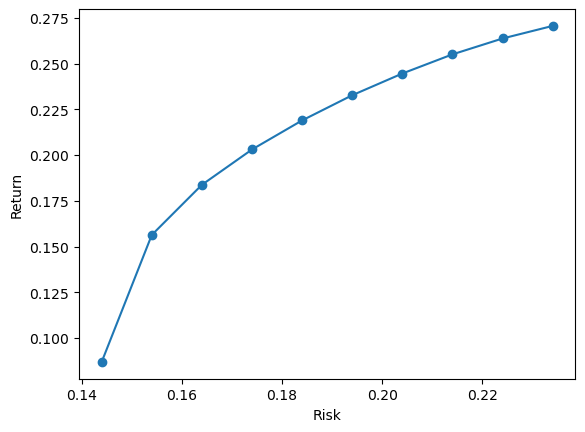

In [31]:
# Create a pandas DataFrame to store the results
results_df = pd.DataFrame({'Key':np.array(range(1,n+1)),'Return': returns, 'Risk': np.array(minRiskSD)})
print(results_df)
# Plot the efficient frontier
ax = results_df.plot(x="Risk", y="Return", kind="line", style="-o", legend=False)
ax.set_ylabel("Return")  # Add Y label
print(f"\nThe graph illustrates the positive relationship between the risk level and the return of the optimal portfolios, when the standard deviation increases from {round(np.array(minRiskSD)[0],4)} to {round(np.array(minRiskSD)[9],4)}.\nNotably, in the first change in risk level, the return jumps from {round(np.array(returns)[0]*100,2)}% to {round(np.array(returns)[1]*100,2)}%, highlighting a substantial increase.")

In [21]:
df = pd.DataFrame([(key, *value) for key, values in dWeights.items() for value in values],
                  columns=['Key', 'Symbol', 'Company', 'Weight','Returns','StDev','CV'])

sorted_df = df.sort_values(by=['Key', 'Weight'], ascending=[True, False])
sorted_df.Weight=round(sorted_df.Weight*100,2)
stock_weights_df2=sorted_df[sorted_df.Key==2] #we'll analyze the 2nd level of risk
print(stock_weights_df2[:10])

     Key Symbol          Company  Weight   Returns     StDev        CV
156    2   COST  Costco Wholesal   14.90  0.152902  0.211749  1.384867
153    2    AZN  AstraZeneca PLC   10.78  0.104331  0.249638  2.392750
109    2   ORLY  O'Reilly Automo    9.63  0.210404  0.265085  1.259886
121    2    AEP  American Electr    9.28  0.058861  0.206003  3.499822
127    2    XEL  Xcel Energy Inc    8.77  0.081604  0.206269  2.527682
138    2   TMUS  T-Mobile US, In    6.36  0.188541  0.281068  1.490753
129    2    PEP  PepsiCo, Inc. C    6.05  0.080655  0.182753  2.265861
81     2   CPRT  Copart, Inc. (D    5.78  0.228325  0.264799  1.159746
95     2     EA  Electronic Arts    5.62  0.171697  0.309549  1.802879
101    2   ODFL  Old Dominion Fr    5.29  0.238855  0.291078  1.218639


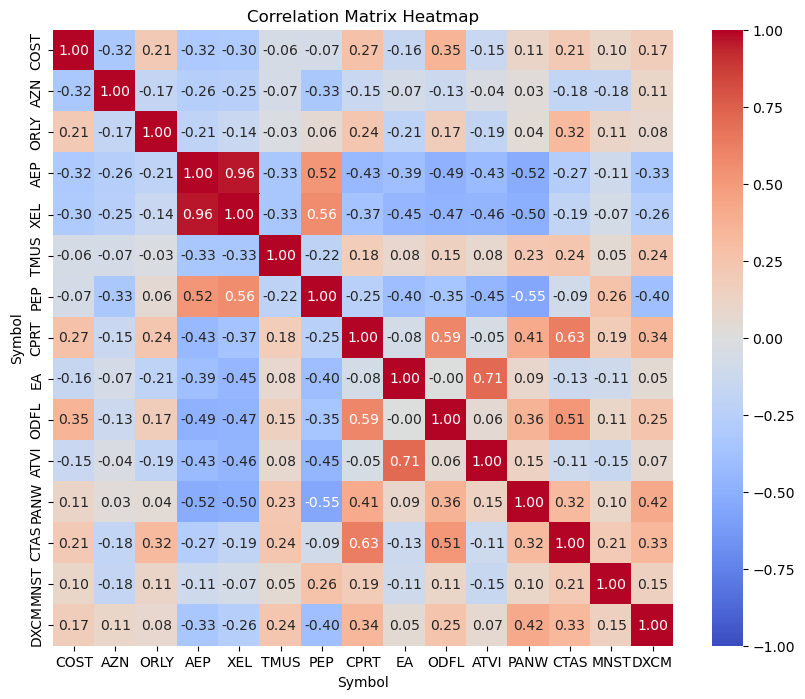


The table represents the portfolio for the second level of risk (0.154). In comparison to the portfolio designed to minimize risk, this portfolio is more balanced and places greater importance on stocks with lower risk per unit of return (CV column), rather than mainly focusing on diversification benefits.The stocks that stand out in this portfolio are Costco Wholesal, AstraZeneca PLC, O'Reilly Automo, and American Electr, with an individual weight over 9%.


In [32]:
#Filtering stocks with a weight > 1%
stocks_rel_2=stock_weights_df2['Symbol'][stock_weights_df2.Weight>1]
covMatrix_3=covMatrix.loc[stocks_rel_2, stocks_rel_2]

# Calculate the correlation matrix
correlation_matrix_3 = np.corrcoef(covMatrix_3)

# Convert the correlation matrix to a pandas DataFrame for better visualization
df_correlation_3 = pd.DataFrame(correlation_matrix_3, columns=stocks_rel_2, index=stocks_rel_2)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlation_3, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

print(f"\nThe table represents the portfolio for the second level of risk ({round(dfRisk.SD[dfRisk.Ref==2].values[0],4)}). In comparison to the portfolio designed to minimize risk, this portfolio is more balanced and places greater importance on stocks with lower risk per unit of return (CV column), rather than mainly focusing on diversification benefits.The stocks that stand out in this portfolio are {stock_weights_df2.Company.iloc[0]}, {stock_weights_df2.Company.iloc[1]}, {stock_weights_df2.Company.iloc[2]}, and {stock_weights_df2.Company.iloc[3]}, with an individual weight over {int(stock_weights_df2.Weight.iloc[3])}%.")

## 4. Conclusion

In conclusion, this efficient frontier analysis empowers portfolio managers and investors to make informed decisions by striking a balance between risk and return. The findings serve as guidance in constructing optimal portfolios that align with desired investment objectives. The data used for this analysis consists of the stocks that compose the Nasdaq 100 index, spanning a period of 10 years. The automated downloading process has facilitated access to historical information on these stocks.

When the primary objective was to minimize risk, the portfolio composition emphasized stocks with lower volatility and higher diversification benefits. However, considering higher risk levels, we observed the increased relevance of stocks with higher returns, lower coeffient of variation index, and more balanced diversification benefits.

It is important to acknowledge potential limitations in this analysis, considering the economic context of the past three years. The period of analysis coincided with significant events such as the COVID-19 pandemic and the subsequent recovery phase. These events were accompanied by factors such as high inflation levels resulting from monetary and fiscal stimulus measures, as well as increased oil costs due to the Ukrainian war. These factors could have introduced distortions in stock performance and impacted the overall market dynamics.

Note that the scaling of covariance from daily to annual introduces certain assumptions that may affect the accuracy of the results. Additionally, specific constraints in portfolio optimization vary based on regulations, preferences, and other factors. Here, we assumed a maximum 15% exposure limit per stock.

*This analysis is for informational purposes only and does not constitute a recommendation.*